In [34]:
#Import python libraries
import numpy as np 
import pandas as pd 
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns


In [35]:
#Read CSV file and display dataset
boston_housing_dataset = pd.read_csv("Boston Housing Dataset.csv", sep=",")
df = pd.DataFrame(boston_housing_dataset)
df.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [36]:
#Check Null (NaN) values
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [37]:
#Check data type of each column (feature + target)
df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

In [38]:
#Check null (NaN) value and replace with new value if exist
#There could be different data type column so we have to find it and based on data type we will replace its value
#For numerical we replace with median and for categorical (object = text/string) with mode

#numerical_col = df.select_dtypes(include =['int64','float64']).columns 
#df[numerical_col] = df[numerical_col].fillna(df[numerical_col].median())

#categorical_col = df.select_dtypes(include = 'object').columns
#for col in categorical_col:
#   df[col] = df[col].fillna(df[col].mode()[0])

In [39]:
#Since we cannot compute with non-numerical values
#Convert categorical (non-numerical) columns into numerical columns (also called dummy variables or one-hot encoded variables)
#df = pd.get_dummies(df,drop_first = True)

#With drop_first=True, it drops the first category to avoid multicollinearity — meaning one column can be predicted from others


In [40]:
#Data description
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


<Axes: >

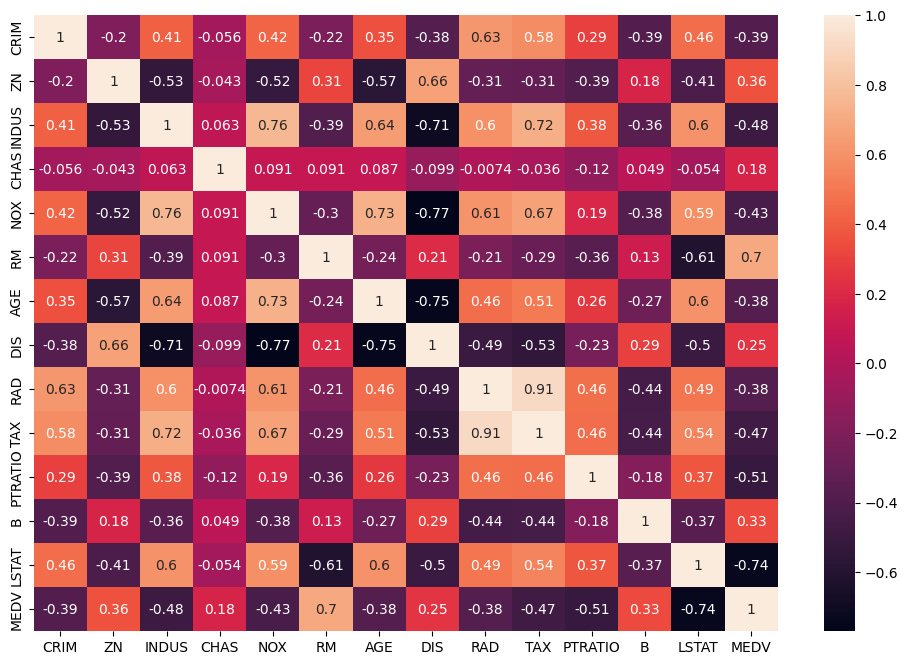

In [41]:
#Heatmap of correlation matrix
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True)

In [42]:
#Seperate features and target variables 
X = df.drop("MEDV", axis=1);
Y = df["MEDV"];

In [43]:
#Split dataset into train and test dataset
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

Linear Regression

In [44]:
#Model training 
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [46]:
#Model testing
y_predict = model.predict(x_test)

mse = mean_squared_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)

print(f"MSE : {mse}")
print(f"R2 : {r2}")

MSE : 21.517444231176952
R2 : 0.7112260057484967


XGBoosting


In [47]:
#Model training 
model = xgb.XGBRegressor()
model.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [49]:
#Model testing
y_predict = model.predict(x_test)

mse = mean_squared_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)

print(f"MSE : {mse}")
print(f"R2 : {r2}")

MSE : 9.238913131574064
R2 : 0.876009538173606
